In [1]:
import pandas as pd
df = pd.read_csv("../data_df.csv")
bertweet_unknown_abbreviations=["tmb", "tftf", "prt", "nts", "mtf", "mrt", "icymi", "ftl", "fomo", "eml", "cr8", "clk", "chk", "bgd", "bfn"]


In [2]:

df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
df

,abbreviation,full_length,count_abbr,count_fl,abbr_first_token_surprisal_mean,abbr_first_token_surprisal_median,abbr_mask_all_surprisal_mean,abbr_mask_all_surprisal_median,abbr_sequential_surprisal_mean,abbr_sequential_surprisal_median,fl_first_token_surprisal_mean,fl_first_token_surprisal_median,fl_mask_all_surprisal_mean,fl_mask_all_surprisal_median,fl_sequential_surprisal_mean,fl_sequential_surprisal_median,abbr_len,fl_len,compression
0,idk,i don't know,36,64,37.461319,38.873390,37.461319,38.873390,37.461319,38.873390,34.278961,34.160316,109.706657,115.751915,225.191971,239.538513,3,12,0.750000
1,rn,right now,29,204,30.756411,35.001385,30.756411,35.001385,30.756411,35.001385,32.881451,32.507683,56.641335,61.147568,115.422226,125.042618,2,9,0.777778
2,omg,oh my god,167,14,39.768925,41.484230,39.768925,41.484230,39.768925,41.484230,39.795784,42.599289,99.686195,100.890472,195.175674,195.720673,3,9,0.666667
3,idc,i don't care,9,9,33.462269,36.236362,33.462269,36.236362,33.462269,36.236362,30.850203,31.373247,108.891891,119.609985,217.621399,244.125290,3,12,0.750000
4,lol,laugh out loud,826,1,28.466780,27.838917,28.466780,27.838917,28.466780,27.838917,34.290604,34.290604,99.933151,99.933151,204.377258,204.377258,3,14,0.785714
5,bro,brother,242,278,28.664240,28.648613,28.664240,28.648613,28.664240,28.648613,27.837458,27.722382,27.837458,27.722382,27.837458,27.722382,3,7,0.571429
6,dm,direct message,100,0,36.006973,36.145760,36.006973,36.145760,36.006973,36.145760,NaN,NaN,NaN,NaN,NaN,NaN,2,14,0.857143
7,sry,sorry,1,152,47.639874,47.639874,47.639874,47.639874,47.639874,47.639874,32.261646,32.983276,32.261646,32.983276,32.261646,32.983276,3,5,0.400000
8,v,very,584,538,29.897020,29.720602,29.897020,29.720602,29.897020,29.720602,35.108437,35.018772,35.108437,35.018772,35.108437,35.018772,1,4,0.750000
9,w,with,1181,11063,32.453712,32.158001,32.453712,32.158001,32.453712,32.158001,29.541964,30.005329,29.541964,30.005329,29.541964,30.005329,1,4,0.750000


In [3]:
print("means sequential: ", df["abbr_sequential_surprisal_mean"].mean(), df["fl_sequential_surprisal_mean"].mean())
print("medians sequential: ", df["abbr_sequential_surprisal_median"].mean(), df["fl_sequential_surprisal_median"].mean())


# first get lens just to find best correlates

means sequential:  49.83854413586994 104.10290934244792
medians sequential:  50.19570355082667 104.84920743306478


In [4]:
print("means mask all: ", df["abbr_mask_all_surprisal_mean"].mean(), df["fl_mask_all_surprisal_mean"].mean())
print("medians mask_all: ", df["abbr_mask_all_surprisal_median"].mean(), df["fl_mask_all_surprisal_median"].mean())
print("counts: ", df["count_abbr"].mean(), df["count_fl"].mean())

means mask all:  39.82395185426224 60.95150689019097
medians mask_all:  40.13227445025777 61.39615414937337
counts:  137.4181818181818 955.2727272727273


In [5]:
df_subset = df[~df['full_length'].str.contains(" ")]
df_subset = df_subset[df_subset["count_abbr"]>2]
df_subset = df_subset[df_subset["count_fl"]>2]
df_subset

,abbreviation,full_length,count_abbr,count_fl,abbr_first_token_surprisal_mean,abbr_first_token_surprisal_median,abbr_mask_all_surprisal_mean,abbr_mask_all_surprisal_median,abbr_sequential_surprisal_mean,abbr_sequential_surprisal_median,fl_first_token_surprisal_mean,fl_first_token_surprisal_median,fl_mask_all_surprisal_mean,fl_mask_all_surprisal_median,fl_sequential_surprisal_mean,fl_sequential_surprisal_median,abbr_len,fl_len,compression
5,bro,brother,242,278,28.664240,28.648613,28.664240,28.648613,28.664240,28.648613,27.837458,27.722382,27.837458,27.722382,27.837458,27.722382,3,7,0.571429
8,v,very,584,538,29.897020,29.720602,29.897020,29.720602,29.897020,29.720602,35.108437,35.018772,35.108437,35.018772,35.108437,35.018772,1,4,0.750000
9,w,with,1181,11063,32.453712,32.158001,32.453712,32.158001,32.453712,32.158001,29.541964,30.005329,29.541964,30.005329,29.541964,30.005329,1,4,0.750000
18,u,you,984,13147,32.891006,34.011238,32.891006,34.011238,32.891006,34.011238,29.253628,29.155426,29.253628,29.155426,29.253628,29.155426,1,3,0.666667
19,2,too,1078,990,30.315847,29.839211,30.315847,29.839211,30.315847,29.839211,31.215172,31.566444,31.215172,31.566444,31.215172,31.566444,1,3,0.666667
20,2,to,1078,17872,30.315847,29.839211,30.315847,29.839211,30.315847,29.839211,27.924805,28.421061,27.924805,28.421061,27.924805,28.421061,1,2,0.500000
21,r,are,496,3101,35.341877,37.119766,35.341877,37.119766,35.341877,37.119766,35.193218,36.972340,35.193218,36.972340,35.193218,36.972340,1,3,0.666667
22,abt,about,3,1224,36.991627,36.075539,36.991627,36.075539,36.991627,36.075539,35.656754,35.186256,35.656754,35.186256,35.656754,35.186256,3,5,0.400000
33,kk,okay,21,90,39.979183,38.547710,39.979183,38.547710,39.979183,38.547710,34.189053,34.414597,34.189053,34.414597,34.189053,34.414597,2,4,0.500000
41,fab,fabulous,39,109,39.795959,39.608700,39.795959,39.608700,39.795959,39.608700,38.501160,37.684486,38.501160,37.684486,38.501160,37.684486,3,8,0.625000


In [6]:
print("means sequential: ", df_subset["abbr_sequential_surprisal_mean"].mean(), df_subset["fl_sequential_surprisal_mean"].mean())
print("medians sequential: ", df_subset["abbr_sequential_surprisal_median"].mean(), df_subset["fl_sequential_surprisal_median"].mean())
print("means mask all: ", df_subset["abbr_mask_all_surprisal_mean"].mean(), df_subset["fl_mask_all_surprisal_mean"].mean())
print("medians mask_all: ", df_subset["abbr_mask_all_surprisal_median"].mean(), df_subset["fl_mask_all_surprisal_median"].mean())

means sequential:  34.18267323420598 33.2904774592473
medians sequential:  34.007374836848335 33.4813175201416
means mask all:  34.18267323420598 33.2904774592473
medians mask_all:  34.007374836848335 33.4813175201416


In [7]:
df.corr(method="pearson", numeric_only=True) # .5-1 is strong, .3-.5 is moderate

,count_abbr,count_fl,abbr_first_token_surprisal_mean,abbr_first_token_surprisal_median,abbr_mask_all_surprisal_mean,abbr_mask_all_surprisal_median,abbr_sequential_surprisal_mean,abbr_sequential_surprisal_median,fl_first_token_surprisal_mean,fl_first_token_surprisal_median,fl_mask_all_surprisal_mean,fl_mask_all_surprisal_median,fl_sequential_surprisal_mean,fl_sequential_surprisal_median,abbr_len,fl_len,compression
count_abbr,1.000000,0.760439,-0.350212,-0.357819,-0.293392,-0.299217,-0.239164,-0.241383,-0.219311,-0.197384,-0.271459,-0.266758,-0.267525,-0.263671,-0.626443,-0.386021,-0.005317
count_fl,0.760439,1.000000,-0.204847,-0.206034,-0.174826,-0.176930,-0.143517,-0.144369,-0.238014,-0.217020,-0.302414,-0.297663,-0.298285,-0.293969,-0.512161,-0.365277,-0.142804
abbr_first_token_surprisal_mean,-0.350212,-0.204847,1.000000,0.976196,0.638676,0.639706,0.418009,0.420961,0.323688,0.356290,0.319836,0.323507,0.278055,0.280387,0.339132,0.245424,0.053780
abbr_first_token_surprisal_median,-0.357819,-0.206034,0.976196,1.000000,0.619963,0.639953,0.403671,0.413642,0.328473,0.360341,0.384114,0.392956,0.347451,0.354314,0.323269,0.275489,0.117269
abbr_mask_all_surprisal_mean,-0.293392,-0.174826,0.638676,0.619963,1.000000,0.996148,0.959914,0.960281,0.245878,0.310872,0.456093,0.447472,0.396048,0.387791,0.427977,0.358666,0.111744
abbr_mask_all_surprisal_median,-0.299217,-0.176930,0.639706,0.639953,0.996148,1.000000,0.955010,0.958287,0.250667,0.315200,0.490359,0.484358,0.432647,0.426696,0.424777,0.372710,0.137494
abbr_sequential_surprisal_mean,-0.239164,-0.143517,0.418009,0.403671,0.959914,0.955010,1.000000,0.999426,0.157043,0.227048,0.391160,0.380996,0.336493,0.326602,0.388528,0.321612,0.088513
abbr_sequential_surprisal_median,-0.241383,-0.144369,0.420961,0.413642,0.960281,0.958287,0.999426,1.000000,0.160508,0.230594,0.408394,0.399023,0.354050,0.344879,0.389209,0.328141,0.098410
fl_first_token_surprisal_mean,-0.219311,-0.238014,0.323688,0.328473,0.245878,0.250667,0.157043,0.160508,1.000000,0.984839,0.197983,0.202662,0.128290,0.130715,0.088818,0.039822,-0.068365
fl_first_token_surprisal_median,-0.197384,-0.217020,0.356290,0.360341,0.310872,0.315200,0.227048,0.230594,0.984839,1.000000,0.204250,0.210757,0.132249,0.135132,0.092847,0.049242,-0.070442


In [8]:
df.corr(method="spearman", numeric_only=True) # >.7 is strong, .4-.6 is moderate

,count_abbr,count_fl,abbr_first_token_surprisal_mean,abbr_first_token_surprisal_median,abbr_mask_all_surprisal_mean,abbr_mask_all_surprisal_median,abbr_sequential_surprisal_mean,abbr_sequential_surprisal_median,fl_first_token_surprisal_mean,fl_first_token_surprisal_median,fl_mask_all_surprisal_mean,fl_mask_all_surprisal_median,fl_sequential_surprisal_mean,fl_sequential_surprisal_median,abbr_len,fl_len,compression
count_abbr,1.000000,0.378840,-0.397641,-0.353787,-0.597709,-0.568448,-0.618049,-0.590148,-0.206153,-0.208403,-0.187550,-0.190728,-0.207940,-0.209264,-0.556518,-0.304753,-0.006537
count_fl,0.378840,1.000000,-0.254595,-0.239971,-0.232167,-0.224286,-0.217315,-0.206555,-0.166199,-0.154781,-0.664600,-0.660508,-0.668230,-0.669880,-0.459660,-0.826148,-0.718822
abbr_first_token_surprisal_mean,-0.397641,-0.254595,1.000000,0.960885,0.874651,0.842785,0.823605,0.787812,0.351117,0.387412,0.212240,0.211468,0.210181,0.204518,0.333488,0.289242,0.067552
abbr_first_token_surprisal_median,-0.353787,-0.239971,0.960885,1.000000,0.828589,0.870120,0.777543,0.813335,0.337216,0.363215,0.318296,0.324474,0.315979,0.316751,0.320598,0.311881,0.107507
abbr_mask_all_surprisal_mean,-0.597709,-0.232167,0.874651,0.828589,1.000000,0.964510,0.994261,0.959979,0.399511,0.466954,0.142223,0.164103,0.140678,0.157668,0.409506,0.234725,-0.046702
abbr_mask_all_surprisal_median,-0.568448,-0.224286,0.842785,0.870120,0.964510,1.000000,0.958771,0.993053,0.383808,0.445846,0.237724,0.268614,0.235665,0.261149,0.399426,0.261075,-0.004625
abbr_sequential_surprisal_mean,-0.618049,-0.217315,0.823605,0.777543,0.994261,0.958771,1.000000,0.966624,0.409035,0.478538,0.132184,0.157410,0.130639,0.150975,0.410085,0.217916,-0.066035
abbr_sequential_surprisal_median,-0.590148,-0.206555,0.787812,0.813335,0.959979,0.993053,0.966624,1.000000,0.391274,0.455885,0.226398,0.260635,0.224339,0.253169,0.400004,0.239647,-0.029644
fl_first_token_surprisal_mean,-0.206153,-0.166199,0.351117,0.337216,0.399511,0.383808,0.409035,0.391274,1.000000,0.980501,0.237549,0.233202,0.245191,0.237154,0.065276,0.019604,-0.053636
fl_first_token_surprisal_median,-0.208403,-0.154781,0.387412,0.363215,0.466954,0.445846,0.478538,0.455885,0.980501,1.000000,0.182740,0.188669,0.191304,0.194598,0.056004,0.000331,-0.066564


In [9]:
# need to do indiv word lengths
import pandas as pd
df = pd.read_csv("../data_df.csv")
drop_unknowns = df[~df["abbreviation"].isin(bertweet_unknown_abbreviations)]

drop_unknowns["abbr_len"] =  drop_unknowns["abbreviation"].str.len()
drop_unknowns["fl_len"] = drop_unknowns["full_length"].str.len()
drop_unknowns["compression"] = 1- (drop_unknowns["abbr_len"]/drop_unknowns["fl_len"])
new_df = pd.DataFrame()
fl_len =  drop_unknowns["fl_len"]
abbr_len = drop_unknowns["abbr_len"]
len = pd.concat([fl_len, abbr_len], ignore_index=True)
counts = pd.concat([drop_unknowns["count_fl"], drop_unknowns["count_abbr"]], ignore_index=True)
surprisal_seq = pd.concat([drop_unknowns["fl_sequential_surprisal_mean"], drop_unknowns["abbr_sequential_surprisal_mean"]], ignore_index=True)
surprisal_mask_all = pd.concat([drop_unknowns["fl_mask_all_surprisal_mean"], drop_unknowns["abbr_mask_all_surprisal_mean"]], ignore_index=True)
new_df["word_length"] = len
new_df["frequency"] = counts
new_df["surprisal_seq"] = surprisal_seq
new_df["surprisal_mask_all"] = surprisal_mask_all
new_df

/var/folders/_l/m75yx49j3q98z5jct8l93xd40000gp/T/ipykernel_11497/3005240206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_unknowns["abbr_len"] =  drop_unknowns["abbreviation"].str.len()
/var/folders/_l/m75yx49j3q98z5jct8l93xd40000gp/T/ipykernel_11497/3005240206.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_unknowns["fl_len"] = drop_unknowns["full_length"].str.len()
/var/folders/_l/m75yx49j3q98z5jct8l93xd40000gp/T/ipykernel_11497/3005240206.py:8: SettingWithCopyWarning: 
A value is tryi

,word_length,frequency,surprisal_seq,surprisal_mask_all
0,12,64,225.191971,109.706657
1,9,204,115.422226,56.641335
2,9,14,195.175674,99.686195
3,12,9,217.621399,108.891891
4,14,1,204.377258,99.933151
...,...,...,...,...
75,3,0,NaN,NaN
76,3,26,35.833855,35.833855
77,2,11,38.661861,38.661861
78,2,7,38.302620,38.302620


In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy
df_drop_nan = np.log2(new_df[new_df['frequency'] != 0])
X_freq = df_drop_nan[["frequency"]].to_numpy()
df_drop_nan = new_df[new_df['surprisal_seq'].notna()]
X_seq = df_drop_nan[["surprisal_seq"]].to_numpy()
df_drop_nan = new_df[new_df['surprisal_mask_all'].notna()]
X_mask_all = df_drop_nan[["surprisal_mask_all"]].to_numpy()

y = df_drop_nan["word_length"].to_numpy()

weights = np.ones_like(y)
for idx, X in enumerate([X_freq, X_seq, X_mask_all]):
    reg = LinearRegression(copy_X=True, fit_intercept=False).fit(X, y, weights)
    r_squared = reg.score(X, y)

    y_predict = reg.predict(X)
    mse = (((y - y_predict)**2 * weights).sum() / weights.sum())**.5

    corr_pearson, p_value_pearson = scipy.stats.pearsonr(X[:, 0], y)
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(X[:, 0], y)

    if idx == 0:
        print("frequency")
    elif idx == 1:
        print("surprisal sequential")
    else:
        print("surprisal mask all")
    print("rsquared, mse: ", r_squared, mse)
    print("pearson corr, pvalue: ", corr_pearson, p_value_pearson)
    print("spearman corr, pvalue: ", corr_spearman, p_value_spearman)

frequency
rsquared, mse:  -0.9391665753620135 5.711278055202386
pearson corr, pvalue:  -0.38658021970487366 0.000795791301047588
spearman corr, pvalue:  -0.3585474412391954 0.001983748454721058
surprisal sequential
rsquared, mse:  0.6772568509271636 2.329991099998208
pearson corr, pvalue:  0.8552099087372571 1.1566317088975168e-21
spearman corr, pvalue:  0.6487740720065419 7.144488930039654e-10
surprisal mask all
rsquared, mse:  0.6814362034484803 2.3148558678472266
pearson corr, pvalue:  0.8416532079990291 2.0838021658603826e-20
spearman corr, pvalue:  0.6498206400513173 6.570494863534676e-10


23.89738681285697 0.1799861798370972 48.343305350708164


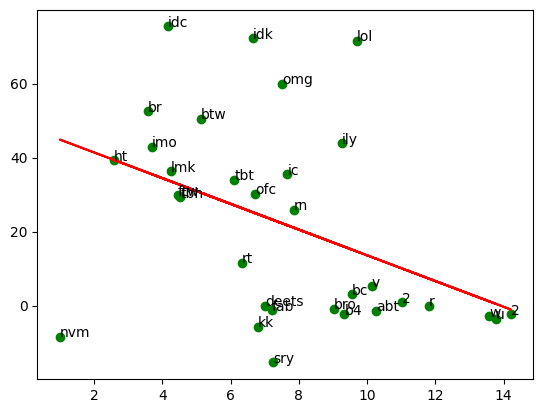

In [11]:
# replicate what mahwold did but with our pairs: modeling difference in log
#frequency between short and long forms as a predictor for difference in surprisal
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv("../data_df.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])

df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_all_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_all_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[~df_drop_nan["abbreviation"].isin(bertweet_unknown_abbreviations)]
x_diff_in_log_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_diff_in_log_freq = np.log2(x_diff_in_log_freq).to_numpy()
x_diff_in_log_freq =  x_diff_in_log_freq[:, None]
y_diff_in_surprisal = df_drop_nan["fl_mask_all_surprisal_mean"] - df_drop_nan["abbr_mask_all_surprisal_mean"] 
y_diff_in_surprisal = y_diff_in_surprisal.to_numpy()
weights = np.ones_like(y_diff_in_surprisal)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_diff_in_log_freq, y_diff_in_surprisal, weights)
r_squared = reg.score(x_diff_in_log_freq, y_diff_in_surprisal)

y_predict = reg.predict(x_diff_in_log_freq)
mse = (((y_diff_in_surprisal - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()
ax.scatter(x_diff_in_log_freq, y_diff_in_surprisal,color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_diff_in_log_freq[i], y_diff_in_surprisal[i]))
plt.plot(x_diff_in_log_freq, reg.predict(x_diff_in_log_freq),color='red')



0.10369866886687715 0.314243613714952 0.6068797445344675


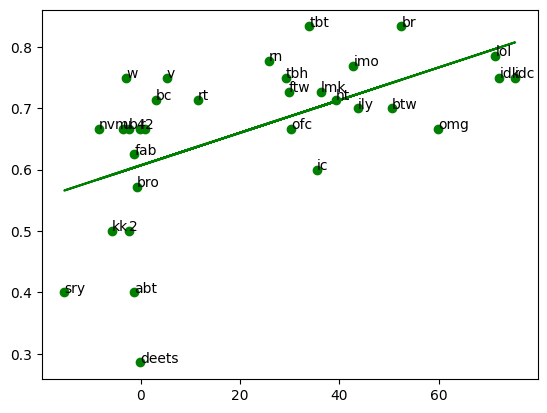

In [12]:
from matplotlib import pyplot as plt

x_diff_in_surprisal = df_drop_nan["fl_mask_all_surprisal_mean"] - df_drop_nan["abbr_mask_all_surprisal_mean"] 
x_diff_in_surprisal = x_diff_in_surprisal.to_numpy()
x_diff_in_surprisal =  x_diff_in_surprisal[:, None]
y_compression = df_drop_nan["compression"]
y_compression = y_compression.to_numpy()
weights = np.ones_like(y_compression)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_diff_in_surprisal, y_compression, weights)
r_squared = reg.score(x_diff_in_surprisal, y_compression)

y_predict = reg.predict(x_diff_in_surprisal)
mse = (((y_compression - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()

ax.scatter(x_diff_in_surprisal, y_compression,color='g')
ax.plot(x_diff_in_surprisal, reg.predict(x_diff_in_surprisal),color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_diff_in_surprisal[i], y_compression[i]))

0.12561840195438723 0.0753417123092045 0.737384963405616


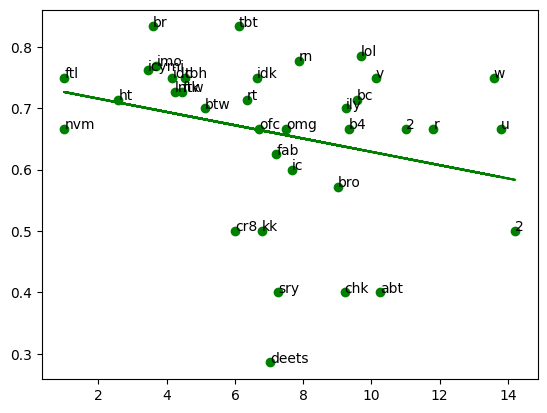

In [13]:
df_drop_nan = df[df['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]

x_diff_in_freq = df_drop_nan["count_fl"] + df_drop_nan["count_abbr"]
x_diff_in_freq = np.log2(x_diff_in_freq.to_numpy())
x_diff_in_freq =  x_diff_in_freq[:, None]
y_compression = df_drop_nan["compression"]
y_compression = y_compression.to_numpy()
weights = np.ones_like(y_compression)
reg = LinearRegression(copy_X=True, fit_intercept=True).fit(x_diff_in_freq, y_compression, weights)
r_squared = reg.score(x_diff_in_freq, y_compression)

y_predict = reg.predict(x_diff_in_freq)
mse = (((y_compression - y_predict)**2 * weights).sum() / weights.sum())**.5
print(mse, r_squared, reg.intercept_)
fig, ax = plt.subplots()

ax.scatter(x_diff_in_freq, y_compression,color='g')
ax.plot(x_diff_in_freq, reg.predict(x_diff_in_freq),color='g')
for i, txt in enumerate(df_drop_nan["abbreviation"].to_list()):
    ax.annotate(txt, (x_diff_in_freq[i], y_compression[i]))


In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy
df = pd.read_csv("../data_df.csv")
df["abbr_len"] =  df["abbreviation"].str.len()
df["fl_len"] = df["full_length"].str.len()
df["compression"] = 1- (df["abbr_len"]/df["fl_len"])
drop_unknowns = df[~df["abbreviation"].isin(bertweet_unknown_abbreviations)]

df_drop_nan = drop_unknowns[drop_unknowns['count_fl'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['count_abbr'] != 0]
df_drop_nan = df_drop_nan[df_drop_nan['fl_mask_all_surprisal_mean'].notna()]
df_drop_nan = df_drop_nan[df_drop_nan['abbr_mask_all_surprisal_mean'].notna()]
df_drop_nan["frequency"] = np.log2(df_drop_nan["count_abbr"] + df_drop_nan['count_abbr'])
X_freq = df_drop_nan[["frequency"]].to_numpy()
df_drop_nan["surprisal_seq"] = df_drop_nan["fl_sequential_surprisal_mean"] + df_drop_nan["abbr_sequential_surprisal_mean"] 
X_seq = df_drop_nan[["surprisal_seq"]].to_numpy()
df_drop_nan["surprisal_mask_all"] = df_drop_nan["fl_mask_all_surprisal_mean"] + df_drop_nan["abbr_mask_all_surprisal_mean"] 

df_drop_nan = df_drop_nan[df_drop_nan['surprisal_mask_all'].notna()]
X_mask_all = df_drop_nan[["surprisal_mask_all"]].to_numpy()


y = df_drop_nan["compression"].to_numpy()
weights = np.ones_like(y)
for idx, X in enumerate([X_freq, X_seq, X_mask_all]):
    # print(X)
    # print(y)
    reg = LinearRegression(copy_X=True, fit_intercept=False).fit(X, y, weights)
    r_squared = reg.score(X, y)

    y_predict = reg.predict(X)
    mse = (((y - y_predict)**2 * weights).sum() / weights.sum())**.5

    corr_pearson, p_value_pearson = scipy.stats.pearsonr(X[:, 0], y)
    corr_spearman, p_value_spearman = scipy.stats.spearmanr(X[:, 0], y)

    if idx == 0:
        print("frequency")
    elif idx == 1:
        print("surprisal sequential")
    else:
        print("surprisal mask all")
    print("rsquared, mse: ", r_squared, mse)
    print("pearson corr, pvalue: ", corr_pearson, p_value_pearson)
    print("spearman corr, pvalue: ", corr_spearman, p_value_spearman)

frequency
rsquared, mse:  -4.314508453418375 0.28868206437417665
pearson corr, pvalue:  0.24907503393626515 0.16922379568601678
spearman corr, pvalue:  0.12462165137658028 0.4967733020109131
surprisal sequential
rsquared, mse:  -3.5503620027454286 0.2671229641758845
pearson corr, pvalue:  0.5201125293370044 0.0022786399817006035
spearman corr, pvalue:  0.5235221833677774 0.0021060355329552308
surprisal mask all
rsquared, mse:  -0.8387859431230842 0.16980631552877443
pearson corr, pvalue:  0.4653644390829318 0.007276322626459571
spearman corr, pvalue:  0.5187192275570639 0.0023526318712694338
